# 8 Career
Yeah, not sure what there is to generalize about this.

In [1]:
# libraries
%matplotlib inline

import os
import sys
import inspect

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
projdir = os.path.dirname(currentdir)
srcdir = os.path.join(projdir,"src")
datasrc = os.path.join(srcdir, "data")

sys.path.insert(0,currentdir)
sys.path.insert(0,projdir)
sys.path.insert(0,srcdir)
sys.path.insert(0,datasrc)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 5000)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

import read
from shared import directories
sys.path.append(directories.ANALYSIS_DIR)
sys.path.append(directories.UTILITIES_DIR)
from analysis import trivariate

import univariate, bivariate, independence, visual, description
import warnings
warnings.filterwarnings('ignore')

## 8.2 Data

In [2]:
# Get Data
sd = read.read()
df = sd['all']
df_male = sd['male']
df_female = sd['female']
career = ['career_label', 'career_label_o', 'same_career']
df_career = df[career]
df_male_career = df_male[career]
df_female_career = df_female[career]
#Drop NA
df_career = df_career.dropna()
df_male_career = df_male_career.dropna()
df_female_career = df_female_career.dropna()

## 8.3 Univariate Analysis
- Top 5 fields were Business, Law, MBA, Social Work and International Affairs. 
- About 12% of the couples had the same field


,career_label
Academic/Research,2320
Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin,2180
Creative Arts/Entertainment,724
Lawyer,695
International/Humanitarian Affairs,547
Undecided,468
Doctor/Medicine,421
Psychologist,261
Engineer,234
Social Work,220


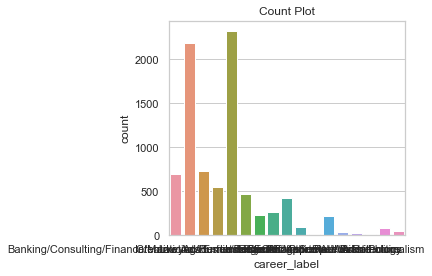

,career_label_o
Academic/Research,2320
Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin,2179
Creative Arts/Entertainment,723
Lawyer,693
International/Humanitarian Affairs,547
Undecided,466
Doctor/Medicine,418
Psychologist,261
Engineer,243
Social Work,220


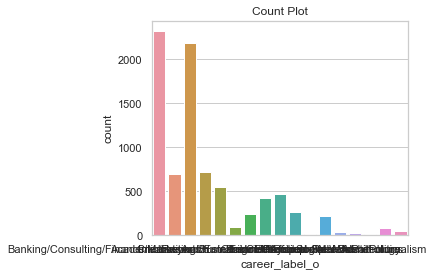

,No,Yes,missing
same_career,6845,1533,0


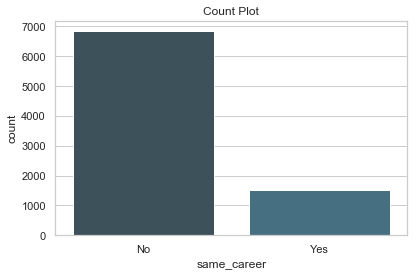

In [3]:
result = univariate.analysis(df_career)
for r in result:
    r['desc']
    r['plot']


## 7.4 Bivariate Analysis

### 7.4.1 Subject Decision by Career
- Top 5 in terms of positive choice...
- Bottom 5

In [4]:
i, d, p = bivariate.analysis(x='career_label', y='dec', df=df)
d['pct'].sort_values(by='Yes', ascending=False)
i

dec,No,Yes
career_label,,
Pro sports/Athletics,0.500000,0.500000
Engineer,0.529915,0.470085
Lawyer,0.538129,0.461871
Psychologist,0.551724,0.448276
Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin,0.555505,0.444495
Academic/Research,0.568534,0.431466
All,0.580091,0.419909
Creative Arts/Entertainment,0.581492,0.418508
Doctor/Medicine,0.619952,0.380048


,x,y,p-Value,Cramer's V,Strength,Result
0,career_label,dec,9.084500e-07,0.059124,Very Weak Association,Significant


### 7.4.2 Partner Decision by Field
- Top 5 in terms of positive choice:

- Bottom 5

In [5]:
i, d, p = bivariate.analysis(x='career_label', y='dec_o', df=df)
d['pct'].sort_values(by='Yes', ascending=False)
d['count']
i

dec_o,No,Yes
career_label,,
International/Humanitarian Affairs,0.517367,0.482633
Lawyer,0.538129,0.461871
Doctor/Medicine,0.562945,0.437055
Undecided,0.564103,0.435897
Journalism,0.568182,0.431818
Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin,0.569266,0.430734
All,0.580449,0.419551
Real Estate,0.589744,0.410256
Creative Arts/Entertainment,0.591160,0.408840


dec_o,No,Yes,All,pct
career_label,,,,
Academic/Research,1394,926,2320,27.69
Architecture,6,4,10,0.12
Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin,1241,939,2180,26.02
Creative Arts/Entertainment,428,296,724,8.64
Doctor/Medicine,237,184,421,5.03
Engineer,155,79,234,2.79
International/Humanitarian Affairs,283,264,547,6.53
Journalism,25,19,44,0.53
Lawyer,374,321,695,8.30


,x,y,p-Value,Cramer's V,Strength,Result
0,career_label,dec_o,0.00113,0.048174,Very Weak Association,Significant


### 7.4.3 Decision by Career Field
slight association

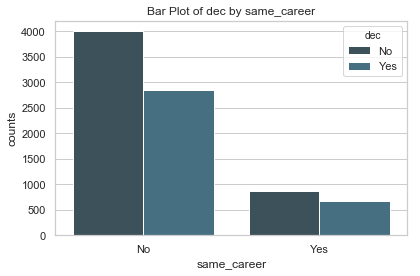

dec,No,Yes
same_career,,
No,0.584660,0.415340
Yes,0.559687,0.440313
All,0.580091,0.419909


,x,y,p-Value,Cramer's V,Strength,Result
0,same_career,dec,0.078044,0.013613,Very Weak Association,Not Significant


In [6]:
i, d, p = bivariate.analysis(x='same_career', y='dec', df=df)
p
d['pct']
i